# EDA With Python and applying Logistic Regression


Here, we will be working on Titanic Dataset from Kaggle. This is a quite famous dataset and very often used by student's first step towards Machnine Learning.

In this we'll try to predict a classification-survival or deceased by implementing Logistic Regression in python for classification.

The version of the Titanic Dataset is "semi-cleaned".

In [1]:
#starting by importing all the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#read the dataset by using pandas
train=pd.read_csv('titanic data_set_kaggle.csv')

In [3]:
train.head()   #to see a few of the details

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

We'll start some exploratory data analysis by checking out missing data!

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
np.shape(train)

(891, 12)

- The current method for handling missing data isn't ideal. It seems like we're missing some information about the data, and Jupyter Notebook might not be providing accurate row counts.

- To address this, let's use a heatmap visualization with Seaborn. Seaborn's .isnull() function (from the Pandas library) can help us identify missing values effectively.
- By creating a heatmap, we can visually explore where missing data is located in our dataset and gain a better understanding of the issue.

<Axes: >

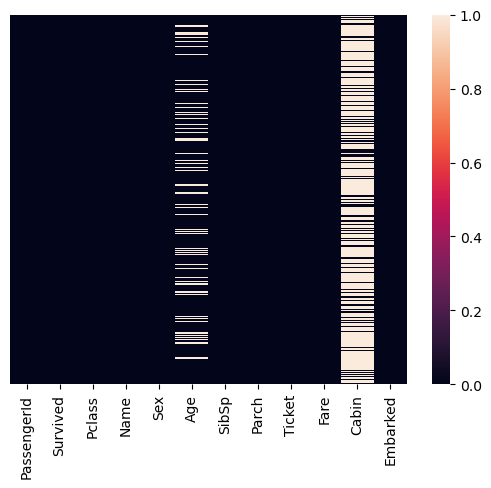

In [6]:
sb.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='rocket')


#cbar: This refers to the colorbar, which is a visual element often used alongside heatmaps. It shows the color range corresponding to the data values in the heatmap.

#cmap: This stands for "colormap" and defines the color scheme used to represent data values in the heatmap. Common colormaps include "viridis," "rocket," "mako," etc. Each colormap offers a different visual representation for highlighting patterns in your data.

#yticklabels: These are the labels displayed on the y-axis of the heatmap. In your case, you mentioned having many rows, so including all the labels might clutter the visualization. We can choose to omit them or display only a select few for better readability.

Now, we'll first try to visualize this data more clearly and the we'll handle the NaN values with something by using some of the statistic concepts

### What observation is made:

- We can observe that 20-30% of the Age data is missing but this is a manageable amount, so we can probably fill in these missing ages with estimates (a process called imputation which refers to the process of estimating and filling in missing values in a dataset).
- On the other hand, in the cabin dataset we can see a significant anount of missing data. It's too much to be helpful in it's current form, so we have two options:

            * completely remove the 'cabin' column from our analysis
            * Create a new feature called "Cabin_known" that indicates whether someone had cabin information recorded (Yes/No or 1/0). This can be more useful than the original Cabin column with so much missing data.

### Now Analyzing: 


On the reviewing the above dataset we can see that at first we need to check the count of person survived and died.

So we would be ploting a counter plot to check the number and visualize it.

<Axes: xlabel='Survived', ylabel='count'>

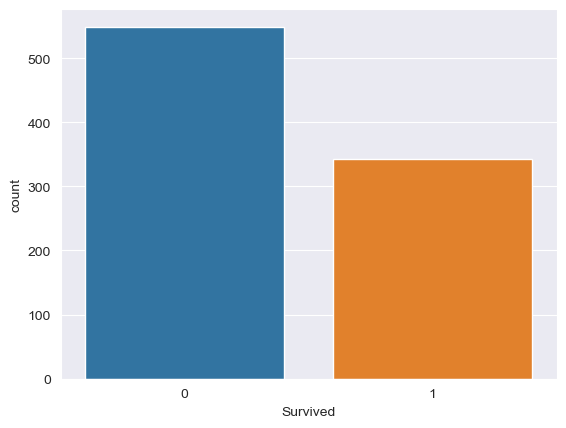

In [7]:
sb.set_style('darkgrid')
sb.countplot(x='Survived', data=train)

And by vizualizing above plot we conclude that around 550 people did not survived and near 330 people survived.

- style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.

- sb.countplot(x='Survived', data=train) 
This is the core part that creates the visualization. sb.countplot is a Seaborn function specifically designed for creating count plots. 

x='Survived' defines the variable on the x-axis.
data=train specifies the data source for the plot. The variable train refers to a Pandas DataFrame containing your dataset.

<Axes: xlabel='Survived', ylabel='count'>

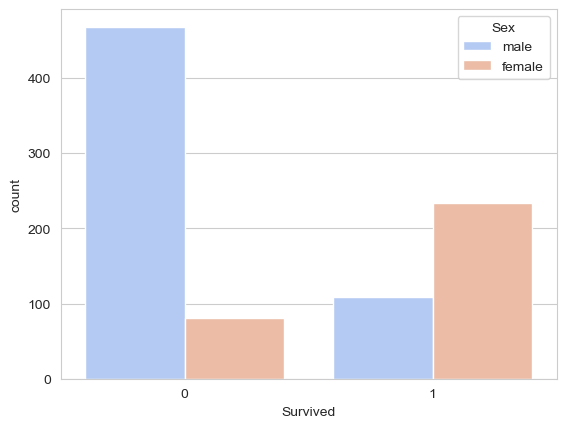

In [8]:
sb.set_style('whitegrid')
sb.countplot(x='Survived', hue='Sex', data=train, palette='coolwarm')

# the hue parameter helps you visualize how a categorical variable influences another variable in your data.
# here we want to see from the people survived how many are male and female.

#palette: palette name, list, or dict
# {flare,'husl', 'Set2', 'tab10', 'pastel' (good for showing differences between groups)}     {'viridis' (green to yellow), 'plasma' (purple to orange), 'inferno' (black to red)}         {'RdBu_r' (red-white-blue), 'coolwarm' (blue to orange), 'bwr' (blue-white-red)}

<Axes: xlabel='Survived', ylabel='count'>

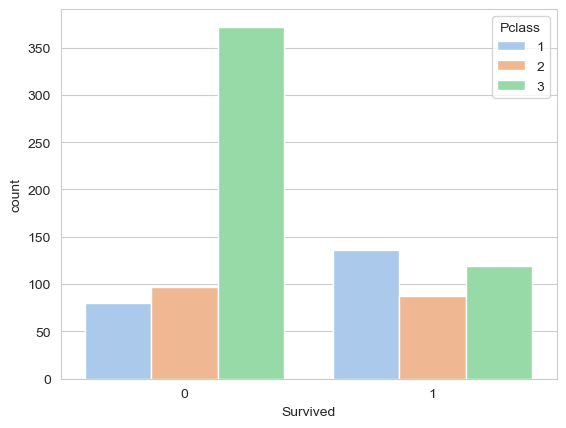

In [9]:
sb.set_style('whitegrid')
sb.countplot(x='Survived', hue='Pclass', data=train, palette='pastel')

<Axes: xlabel='Age', ylabel='Count'>

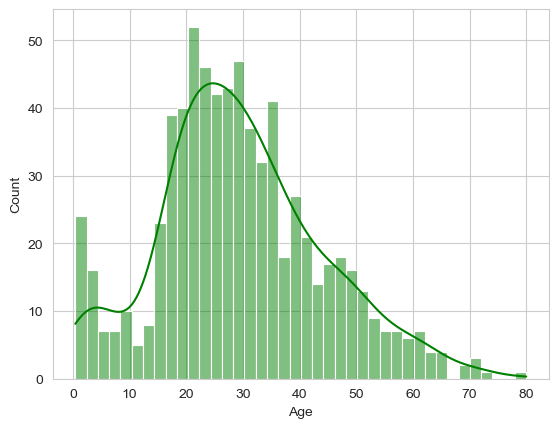

In [10]:
sb.histplot(train['Age'].dropna(), kde=True, color='green', bins=40)

The dropna() method removes the rows that contains NULL values.

Now we will try to get more information of the data like what age range of people died.Also we need to remove 20% (approx.) data which is not available.

<Axes: >

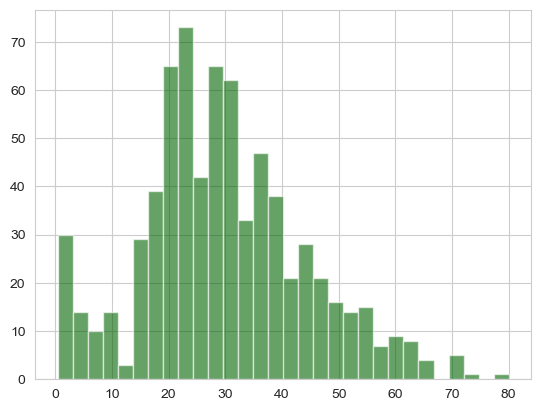

In [11]:
train['Age'].hist(bins=30,color='darkgreen',alpha=0.6)

Now, we'll try to find the countplot of siblingsand spouses

<Axes: xlabel='SibSp', ylabel='count'>

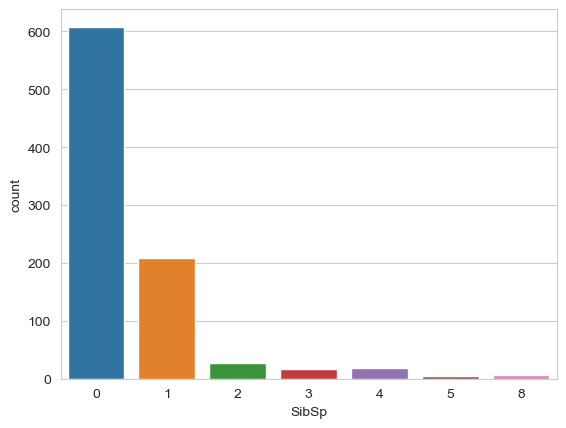

In [12]:
sb.countplot(x='SibSp',data=train)

Next, we'll find the fare histogram where will see the average fare

<Axes: >

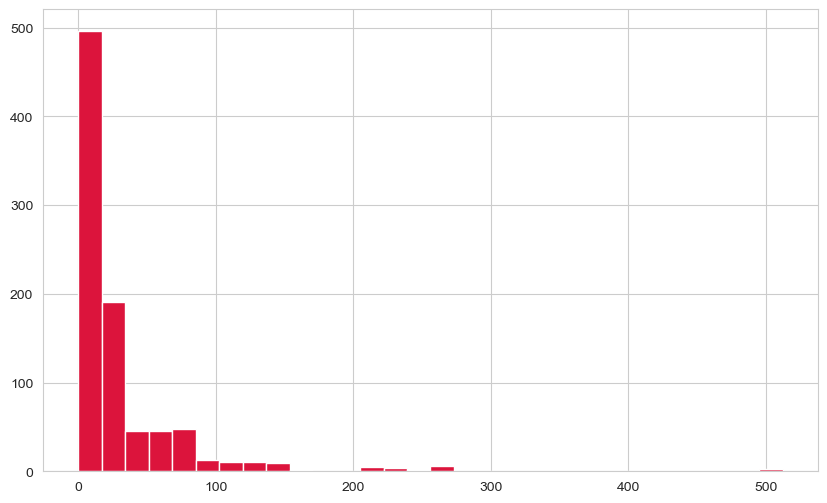

In [13]:
train['Fare'].hist(color='crimson', bins=30, figsize=(10,6))

### Cufflinks for plots:

- Cufflinks isn't an entirely standalone library for creating plots. It actually acts as a bridge between two other powerful tools:

1. Pandas: This is a popular Python library for data manipulation and analysis. It provides efficient data structures like DataFrames that hold tabular data.

2. Plotly: This is a Python graphing library that creates interactive visualizations. Plotly charts are known for being visually appealing and highly customizable.

- Cufflinks essentially simplifies the process of using Plotly for data visualization when you're working with Pandas DataFrames. It provides a layer of abstraction that lets you create Plotly charts directly from your Pandas DataFrames with minimal code.

In [14]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind='hist',bins=30,color='pink')

- Plotly.py: The core library behind cufflinks, offering interactive visualizations directly (without the Pandas-specific layer of cufflinks).


- Choosing the right tool:

1. Use Cufflinks if you want interactive visualizations directly from your Pandas DataFrames and need more than just histograms. Cufflinks leverages Plotly, so Cufflink plots inherit the strengths of Plotly (interactivity, aesthetics).

2. Use hist if you specifically need to visualize the distribution of a continuous variable as a histogram. You can use libraries like Matplotlib or Seaborn for creating histograms, which might offer more customization options compared to Cufflinks' built-in histograms. "hist" is a fundamental tool for understanding data distribution, and several libraries offer variations with different features.

## Data Cleaning:

- We decided to address missing age data by filling it in, rather than dropping entire rows. While taking the average age of all passengers is an option (imputation), we can be more strategic.

- Here's the key insight: Passengers' ages likely vary depending on their travel class (e.g., first class might have older passengers on average compared to third class). Therefore, filling in missing ages based on the average age within each passenger class (mean imputation by class) would be a more accurate approach.

- This strategy is particularly important for large datasets with significant missing data. By considering additional factors like passenger class, we can create more realistic imputations and improve the overall quality of our data.

In [ ]:
#plt.figure(figsize=(width, height)) can control the canvas size of your Matplotlib visualizations, making them suitable for different purposes.

plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass', y='Age', data=train, palette='spring')

# after a few analysis we saw that there is some relation neetween Pclass and Age
# so, we are trying to find out that w.r.t the Pclass what is the avg Age of the people

From the above boxplot, we can see that the avg age of Pclass 1 is approx 38. Similarly, for the avg age of Pclass 2 is approx 29 and that of Pclass 3 is approx 23.

Wealthier passengers (higher classes) tend to be older on average.
We'll use these class-based average ages to fill in missing age values based on passenger class (Pclass).

In [ ]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        
        if Pclass == 2:
            return 29
        
        if Pclass == 3:
            return 23
        
    return Age

now, lets use this above made function

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) 
# axis=1 over here refers to columns and axis=0 refers to row

In [ ]:
# lets check the same heatmap

sb.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='rocket')


We can see that the missing values of Age are fixed.
Now, lets drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
sb.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='rocket')


#  inplace=True: This is an important argument. By setting it to 
# True, you're modifying the original train DataFrame itself. If you 
# set it to False (default), a new DataFrame without the "Cabin" 
# column would be returned, but the original train would remain 
# unchanged.

In [ ]:
train.head()

In [ ]:
train.dropna(inplace=True)
# This line removes rows from the train DataFrame that contain missing values (NaN or NULL) in any of their columns.

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

#### What are dummy variables ?

Dummy variables, also known as indicator variables, are categorical variables(dtype: object) represented by binary values (0 or 1) to encode different categories. In pandas, you can create dummy variables from categorical columns using the pd.get_dummies function.

#### Why Use Dummy Variables?
- Many machine learning models work best with numerical features. Dummy variables convert categorical data into a numerical format suitable for these models.
- They help capture the relationship between different categories of a feature and the target variable in your analysis.

In [ ]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

drop_first=True in pd.get_dummies is a helpful technique to prevent multicollinearity and ensure the statistical validity of your regression models when working with categorical variables.

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
train = pd.concat([train, sex, embark], axis=1)

In [ ]:
train.head()

Now, Our data is ready for our model!

## Using Logistic Regression for Building the model

Let's start by splitting our data into a training set and test set.  

#### Train Test Split

In [ ]:
train.drop('Survived', axis=1).head()
# as survived is a dependent feature so we are dropping this 

In [ ]:
train['Survived'].head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1)
                                                   , train['Survived'], test_size=0.10, random_state=101)

## Training and Predicting


In [ ]:
from sklearn.linear_model import LogisticRegression

#### 1. Import train_test_split:
"from sklearn.model_selection import train_test_split"

This line imports the train_test_split function from the model_selection module of scikit-learn. This function is used to split a dataset into training and testing sets.

#### 2. Data Splitting:

The train_test_split function separates the data into training and testing sets. The training set (70%) is used to train the model, while the testing set (30%) is used for evaluation later.
The target variable ("Survived") is excluded from the training features (X_train) to prevent data leakage during model training.

- X_train: Features for the training set.
- X_test: Features for the testing set.
- Y_train: Target variable for the training set.
- Y_test: Target variable for the testing set.

#### 3. Logistic Regression Model:

"from sklearn.linear_model import LogisticRegression"

The LogisticRegression class is imported for building a classification model suitable for binary prediction tasks like survival (survived or not).

#### 4. Model Creation: 

"logmodel = LogisticRegression()"

An instance of the LogisticRegression class is created, representing the model itself. Default hyperparameters are used initially, but can be customized for further optimization.

#### 5. Model Training:

"logmodel.fit(X_train, y_train)"

The fit method trains the model using the training data (X_train and y_train). During this process, the model learns the relationships between the features and the target variable (survival).

##### In summary, this code snippet lays the groundwork for building a survival prediction model. The trained model can then be used to make predictions on unseen data and assess its accuracy in classifying passenger survival outcomes.

In [ ]:
logmodel = LogisticRegression(max_iter=1000)  # Increase from default (100)
logmodel.fit(X_train, Y_train)

##### error: lbfgs failed to converge (status=1):
##### STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
- Convergence refers to the model's ability to find a solution that minimizes the loss function (a measure of how well the model fits the data). In this case, the solver algorithm (lbfgs by default in scikit-learn's Logistic Regression) wasn't able to reach an optimal solution within the set number of iterations.
##### To address the warning:

- Increase the Number of Iterations (max_iter):  The most straightforward approach is to increase the maximum number of iterations allowed for the solver. You can achieve this by specifying a higher value for the max_iter parameter when creating the Logistic Regression model:

logmodel = LogisticRegression(max_iter=1000) # Increase from default 100 logmodel.fit(X_train, y_train)

- Scale the Data: Scaling your features to a similar range can improve convergence, especially if your data has features with significantly different scales. Scikit-learn offers various scaling methods like StandardScaler or MinMaxScaler in the preprocessing module. Here's an example using StandardScaler:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() X_train_scaled = scaler.fit_transform(X_train) X_test_scaled = scaler.transform(X_test)

logmodel = LogisticRegression() logmodel.fit(X_train_scaled, y_train)

###### First try increasing max_iter first as it's a simpler solution. If increasing max_iter doesn't help or you suspect scaling issues, then incorporate data scaling using techniques like those mentioned above.

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(Y_test, predictions)

In [ ]:
accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(Y_test, predictions)

In [ ]:
accuracy

In [ ]:
predictions

###### Let's see what's happenning this the above code:
- predictions = logmodel.predict(X_test)

This line uses the trained model (logmodel) to make predictions on the testing set (X_test). The model takes the features from each data point in X_test and predicts the corresponding survival outcome (0 for not survived, 1 for survived). The predictions are stored in the predictions variable.

- from sklearn.metrics import confusion_matrix

This line imports the confusion_matrix function from the sklearn.metrics module. This function is used to evaluate the performance of a classification model by creating a confusion matrix.

The confusion matrix is a table that summarizes the model's performance by categorizing the data points based on actual and predicted labels. It typically looks like this:
        
           Predicted
    
     |     0     |     1
-----|-----------|-----------
Actual|     0     |     TP    |   FN
-----|-----------|-----------
     |     1     |     FP    |   TN
-----|-----------|-----------


    TP (True Positive): Correctly predicted positive cases (e.g., correctly predicted survived).
    
    TN (True Negative): Correctly predicted negative cases (e.g., correctly predicted not survived).

    FP (False Positive): Incorrectly predicted positive cases (e.g., predicted survived but actually not).
    
    FN (False Negative): Incorrectly predicted negative cases (e.g., predicted not survived but actually survived).

- accuracy = confusion_matrix(y_test, predictions)

This line calculates the confusion matrix (accuracy) using the actual labels (y_test) and the model's predictions. The confusion matrix is a table that summarizes the number of correct and incorrect predictions for each class (survived/not survived) in this case.

- print(accuracy)

This line prints the resulting confusion matrix, which you might not see displayed within the code itself but would be shown in the output. Analyzing the confusion matrix can reveal details about the model's performance, such as the number of true positives, false positives, true negatives, and false negatives.

- from sklearn.metrics import accuracy_score

This line imports the accuracy_score function from the sklearn.metrics module. This function calculates the overall accuracy of a classification model.

- accuracy = accuracy_score(y_test, predictions)  print(accuracy)

This line calculates the accuracy of the model (accuracy_score) by comparing the actual labels (y_test) with the model's predictions. The result is printed, representing the percentage of correct predictions made by the model on the testing set.

* Accuracy = (TP + TN) / Total Number of Samples
  The result is stored in the variable accuracy.

### Evaluation:

Now, we can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report

* The line from sklearn.metrics import classification_report imports the classification_report function from the sklearn.metrics module in Python. This function is specifically designed to evaluate the performance of classification machine learning models.

###### Benefits of Using classification_report:

* Provides a comprehensive overview of your model's performance beyond just accuracy.
* Helps identify potential weaknesses in your model by highlighting classes where precision, recall, or F1-score might be low.
* Offers insights into class imbalances if your dataset has uneven distributions of classes.

In [ ]:
print(classification_report(Y_test,predictions))

- The line print(classification_report(y_test, predictions)) displays a detailed performance evaluation of your Logistic Regression model for the Titanic passenger survival prediction task. Here's a breakdown of what it does:

- Function:
classification_report: This function, imported from sklearn.metrics, is used to generate a comprehensive report on a classification model's performance.

###### Example Interpretation:

Imagine the report shows high precision for the "survived" class but lower recall. This suggests the model might be good at avoiding false positives (incorrectly predicting survival), but it might miss some actual survivors (low recall). This could be a starting point for further investigation and model optimization.

By analyzing the classification report generated by this line, you gain valuable insights into how well your model generalizes to unseen data and classifies passenger survival outcomes in the Titanic dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt  # Still needed for basic plot elements

# ... your existing code for data loading, train-test split, etc.

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, Y_train)

# Make predictions on the test set
predictions = logmodel.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Confusion matrix with heatmap visualization using Seaborn
cm = confusion_matrix(Y_test, predictions)
ax = sns.heatmap(cm, annot=True, fmt="d")  # d: integer format for counts in heatmap

# Add labels and title for clarity
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix - Logistic Regression')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, Y_train)

# Make predictions on the test set
predictions = logmodel.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Plot the accuracy (simple bar plot)
plt.bar(['Test Accuracy'], [accuracy],color='green')
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()